# 1° Avance

Importamos las librerias que vamos a utilizar, especificamente, Numpy y Pandas

In [5]:
import pandas as pd
import numpy as np

Leemos el archivo .csv de la consigna con Pandas

In [2]:
df = pd.read_csv("C:/Users/gianp/Documents/Henry DA/Excel/data_latinoamerica.csv", parse_dates = ["date"]) #aseguramos que columna "date" se interprete como fecha.
df.head(5) #muestra los primeros 5 registros de la tabla para verificar que se importó bien.

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2020-01-01,AR,Argentina,3.0,0.0,3.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
1,AR,2020-01-02,AR,Argentina,14.0,0.0,17.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
2,AR,2020-01-03,AR,Argentina,3.0,0.0,20.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
3,AR,2020-01-04,AR,Argentina,7.0,0.0,27.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
4,AR,2020-01-05,AR,Argentina,5.0,0.0,32.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN


Obtenemos un rápido resumen del DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12216057 entries, 0 to 12216056
Data columns (total 50 columns):
 #   Column                                 Dtype         
---  ------                                 -----         
 0   location_key                           object        
 1   date                                   datetime64[ns]
 2   country_code                           object        
 3   country_name                           object        
 4   new_confirmed                          float64       
 5   new_deceased                           float64       
 6   cumulative_confirmed                   float64       
 7   cumulative_deceased                    float64       
 8   cumulative_vaccine_doses_administered  float64       
 9   population                             float64       
 10  population_male                        float64       
 11  population_female                      float64       
 12  population_rural                       float64       


Seleccionamos los países donde se expandirán: Colombia, Argentina, Chile, México, Perú y Brasil

In [5]:
#Vemos como están escritos los nombres de los paises en la base original para luego poder filtrar
df["country_name"].unique()

array(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
       'Costa Rica', 'Cuba', 'Dominican Republic', 'Ecuador', 'Guatemala',
       'Honduras', 'Mexico', 'Nicaragua', 'Panama', 'Peru', 'Puerto Rico',
       'Paraguay', 'El Salvador', 'Uruguay', 'Venezuela'], dtype=object)

In [ ]:
#Creamos nuevo df filtrado por los paises de interés
paises = ["Colombia","Argentina","Chile","Mexico","Peru","Brazil"] #Creamos lista con nombres de países
df_latinoamerica = df[df["country_name"].isin(paises)] #Filtramos el df por los países de interés
print(df_latinoamerica["country_name"].unique()) #Verificamos que se ejecutó correctamente
print(df_latinoamerica.shape) #Chequeamos tamaño de nuevo df

['Argentina' 'Brazil' 'Chile' 'Colombia' 'Mexico' 'Peru']
(11970289, 50)


Verificamos si existen distintas sub-regiones dentro de los paises que tenemos que analizar

In [8]:
print(df_latinoamerica["location_key"].unique())

['AR' 'AR_A' 'AR_A_007' ... 'PE_UCA_0304' 'PE_UCA_0305' 'PE_UCA_0401']


Filtramos las subregiones de los paises de interés

In [11]:
df_latinoamerica = df_latinoamerica[df_latinoamerica["location_key"].isin(["AR","CL","CO","MX","PE","BR"])] #Nos filtramos por regiones principales
print(df_latinoamerica.shape) #Chequeamos nueva composición de df
print(df_latinoamerica["location_key"].unique())

(5946, 50)
['AR' 'BR' 'CL' 'CO' 'MX' 'PE']


Filtramos los datos con fechas mayores a 2021-01-01.

In [ ]:
df_fechas = df_latinoamerica.loc[df_latinoamerica["date"]>"2021-01-01"]
print(df_fechas.shape) #Chequeamos nueva composición de df
print(df_fechas["date"].min()) #Verificamos que se haya ejecutado correctamente

(3744, 50)
2021-01-02 00:00:00


Comparamos a nivel de país la cantidad de valores faltantes.

In [17]:
null_counts = df_fechas.groupby("country_name").apply(lambda x: x.isnull().sum()) # Contamos valores nulos por país y columna
null_columns = null_counts.loc[:, null_counts.sum() > 0]# Filtramos columnas que tengan al menos un valor nulo en algún país
null_columns

C:\Users\gianp\AppData\Local\Temp\ipykernel_58504\1030818712.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  null_counts = df_fechas.groupby("country_name").apply(lambda x: x.isnull().sum()) # Contamos valores nulos por país y columna


,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,relative_humidity,new_recovered,cumulative_recovered
country_name,,,,,,,,,,,,
Argentina,4,4,4,4,4,6,6,6,6,6,624,624
Brazil,2,2,2,2,17,7,6,6,10,7,3,3
Chile,4,4,4,4,13,6,6,6,6,6,4,624
Colombia,4,4,4,4,290,7,7,7,47,7,237,237
Mexico,3,3,3,3,217,7,7,7,7,7,624,624
Peru,4,4,4,4,43,9,9,9,14,9,624,624


Eliminamos filas y columnas con el 100% de valores nulos

In [20]:
df_nan = df_fechas.dropna(axis=0,how="all") # Eliminamos filas con todos sus valores nulos
df_nan = df_fechas.dropna(axis=1,how="all") # Eliminamos columnas con todos sus valores nulos

Verificamos cantidad de nulos por columna

In [ ]:
df_nan.isnull().sum()[df_nan.isnull().sum()>0] # Suma cantidad de nulos agrupando por columna

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64

Sacamos el 60% de la cantidad total de registros por variable en el df vigente

In [30]:
barrera = df_nan.shape[0] * 0.6 #Indexamos por el total de filas del df y nos quedamos con el 60%
print(barrera)

2246.4


Verificamos que variables se encuentran con el total de valores nulos mayor al 60% del total de registros

In [31]:
nulos = df_nan.isnull().sum()[df_nan.isnull().sum()>barrera] # Filtramos los valores nulos que superan la barrera
print(nulos)

cumulative_recovered    2736
dtype: int64


Eliminamos todas las columnas que tengan registros nulos mayores al 60% de los registros totales. Esto es una forma de eliminar columnas que no cumplan con el criterio de completitud.

In [32]:
cols_eliminar = nulos.index #Nos quedamos con los nombres de las columnas que hay que eliminar
df_final = df_nan.drop(columns=cols_eliminar) #Eliminamos estas columnas con total de nulos >60%
df_final.shape #Chequeamos nueva cantidad de columnas

(3744, 49)

Evaluamos que columnas todavía quedan con valores nulos

In [35]:
valores_nulos = df_final.isnull().sum()[df_final.isnull().sum()>0] #Suma de valores nulos por columna y filtrado por aquellas que efectivamente contengan valores nulos 
print(valores_nulos)
cols_valores_nulos = valores_nulos.index #Nos quedamos con los nombres de estas columnas

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
dtype: int64


Completamos los valores nulos con la mediana de cada variable para cada país

In [36]:
for columna in cols_valores_nulos: # iteramos sobre las columnas con valores nulos
    df_final[columna] = df_final.groupby("country_name")[columna].transform(lambda x: x.fillna(x.median())) # reemplazamos los valores nulos con el valor medio de la columna agrupando por pais

print(df_final.isnull().sum()[df_final.isnull().sum()>0]) # verificamos si ejecutamos correctamente

new_recovered    1872
dtype: int64


c:\Users\gianp\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\gianp\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\gianp\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Reemplazamos valores nulos de "new_recovered" con 0

In [8]:
df_final["new_recovered"] = df_final["new_recovered"].fillna(0)
print(df_final.isnull().sum()[df_final.isnull().sum()>0]) # verificamos si ejecutamos correctamente

Series([], dtype: int64)


Guardamos los datos filtrados en un archivo nuevo

In [39]:
df_final.to_csv('DatosFinalesFiltrados.csv', index=False) #Guarda el archivo csv con los datos filtrados

Creamos una función para sacar la media, mediana, varianza y rango de una columan y país que se especifique

In [17]:
def func_estadisticas (pais,col): #Definimos función donde el argumento es la columna numérica a analizar
    datos = df_final[df_final["country_name"] == pais][col] #Filtramos la base de datos para el país seleccionado
    print(f"Para {pais} la variable {col}")
    print(f"La media es: {datos.mean()}") #calculamos media
    print(f"La mediana es: {datos.median()}") #calculamos mediana
    print(f"La varianza es: {datos.var()}") #calculamos varianza
    print(f"El rango es: {abs(datos.max()) - abs(datos.min())}") #calculamos rango

func_estadisticas("Colombia","new_confirmed") #Evaluamos como funciona

Para Colombia la variable new_confirmed
La media es: 7375.972756410257
La mediana es: 2502.5
La varianza es: 85201731.13569319
El rango es: 40415.0


Aplicamos bucle for para el cálculo de estadísticas descriptivas para cada variable de cada país

In [ ]:
df_numerico = df_final.select_dtypes(include=['number']) # Selecciona solo las columnas con datos numéricos

for pais in paises:
    for col in df_numerico.columns: # Itera sobre las columnas, que son numéricas, del dataframe
        func_estadisticas(pais,col) # Llama a la función que calcula estadísticos con el nombre de la columna como argumento

Para Colombia la variable new_confirmed
La media es: 7375.972756410257
La mediana es: 2502.5
La varianza es: 85201731.13569319
El rango es: 40415.0
Para Colombia la variable new_deceased
La media es: 184.49679487179486
La mediana es: 91.5
La varianza es: 40860.312991315805
El rango es: 716.0
Para Colombia la variable cumulative_confirmed
La media es: 4767323.514423077
La mediana es: 5025772.5
La varianza es: 2074344369058.8137
El rango es: 4580874.0
Para Colombia la variable cumulative_deceased
La media es: 124540.48878205128
La mediana es: 139787.0
La varianza es: 903190144.9501146
El rango es: 104964.0
Para Colombia la variable cumulative_vaccine_doses_administered
La media es: 36657353.586538464
La mediana es: 35920610.5
La varianza es: 427442326126251.7
El rango es: 87566523.0
Para Colombia la variable population
La media es: 50882884.0
La mediana es: 50882884.0
La varianza es: 0.0
El rango es: 0.0
Para Colombia la variable population_male
La media es: 24984564.0
La mediana es: 249

# Avances 2° y 3°

Importamos librerías necesarias para utilizar en este avance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Leemos el archivo .csv filtrado en el avance anterior con Pandas

In [2]:
df_final = pd.read_csv("DatosFinalesFiltrados.csv", parse_dates = ["date"]) #aseguramos que columna "date" se interprete como fecha.
df_final.set_index("date", inplace=True) #Asignamos la columna "date" para que sea el índice del DataFrame
df_final.head(5) #muestra los primeros 5 registros de la tabla para verificar que se importó bien.

,location_key,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,...,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered
date,,,,,,,,,,,,,,,,,,,,,
2021-01-02,AR,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,19523766.0,...,43.581350,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,0.0
2021-01-03,AR,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,19523766.0,...,74.880846,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,0.0
2021-01-04,AR,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,19523766.0,...,60.805923,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,0.0
2021-01-05,AR,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,19523766.0,...,72.972595,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,0.0
2021-01-06,AR,AR,Argentina,14496.0,131.0,1718102.0,47293.0,34162.0,44938712.0,19523766.0,...,52.241997,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,0.0


### Análisis Univariado

Función para calcular propiedades estadísticas del data frame

In [38]:
def estadisticos(country = None): #El argumento es un país por si queremos filtrar para un país en específico
    if country == None:
        filtrado = df_final #En caso de que no se especifique se calcula para toda la base
    else:
        filtrado = df_final[df_final["country_name"] == country] #Se filtra la base para el país
    final = filtrado.describe() # Obtenemos los estadísticos descriptivos del DataFrame
    final.loc["median"] = filtrado.select_dtypes(include=['number']).median() # Agregamos la mediana de cada columna numérica
    return final

estadisticos()

,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_rural,population_urban,...,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered
count,3744.000000,3744.000000,3.744000e+03,3744.000000,3.744000e+03,3.744000e+03,3.744000e+03,3.744000e+03,3.744000e+03,3.744000e+03,...,3744.000000,3.744000e+03,3.744000e+03,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000
mean,13893.902511,276.185096,6.775172e+06,193076.245459,7.429023e+07,7.772147e+07,3.787035e+07,3.927162e+07,1.255498e+07,6.833931e+07,...,62.311408,1.443888e+07,2.636580e+06,59502.500000,76.808500,154.274667,81.428000,36.566667,14.816667,8696.853365
std,24220.469432,507.242950,7.989233e+06,182858.586983,8.995962e+07,6.713776e+07,3.318494e+07,3.448407e+07,1.008074e+07,5.829529e+07,...,15.799742,5.710077e+06,2.584740e+06,45125.320206,1.597394,27.000146,11.800623,13.027569,1.665972,22965.700237
min,-573.000000,0.000000,9.710000e+02,1.000000,1.800000e+01,1.757400e+07,8.972014e+06,8.601989e+06,2.341903e+06,1.661014e+07,...,10.296407,6.723516e+06,7.094180e+05,12027.000000,74.992000,107.669000,59.035000,25.300000,12.400000,-31119.000000
25%,1536.750000,26.000000,2.130303e+06,59255.750000,2.099960e+07,2.938188e+07,1.445076e+07,1.493113e+07,3.599141e+06,2.539034e+07,...,51.969374,1.055471e+07,1.090598e+06,16425.000000,75.672000,146.370000,77.999000,26.600000,12.600000,0.000000
50%,5133.000000,99.000000,3.632144e+06,139665.000000,4.153706e+07,4.791080e+07,2.225416e+07,2.324582e+07,8.316128e+06,4.108344e+07,...,65.230404,1.291832e+07,1.543881e+06,45582.000000,76.518000,149.351000,82.149000,33.300000,15.750000,0.000000
75%,14834.000000,312.000000,6.223497e+06,214939.500000,7.574469e+07,1.109920e+08,5.485523e+07,5.748131e+07,2.494867e+07,1.026269e+08,...,74.365927,2.167191e+07,2.690269e+06,102418.000000,77.109000,184.379000,91.421000,37.000000,15.800000,6418.000000
max,298408.000000,11447.000000,3.456883e+07,685203.000000,3.478685e+08,2.125594e+08,1.044358e+08,1.081236e+08,2.780789e+07,1.832416e+08,...,94.817706,2.184651e+07,8.241430e+06,134981.000000,80.042000,188.528000,95.815000,63.900000,16.600000,282957.000000
median,5133.000000,99.000000,3.632144e+06,139665.000000,4.153706e+07,4.791080e+07,2.225416e+07,2.324582e+07,8.316128e+06,4.108344e+07,...,65.230404,1.291832e+07,1.543881e+06,45582.000000,76.518000,149.351000,82.149000,33.300000,15.750000,0.000000


Histogramas de las variables clave

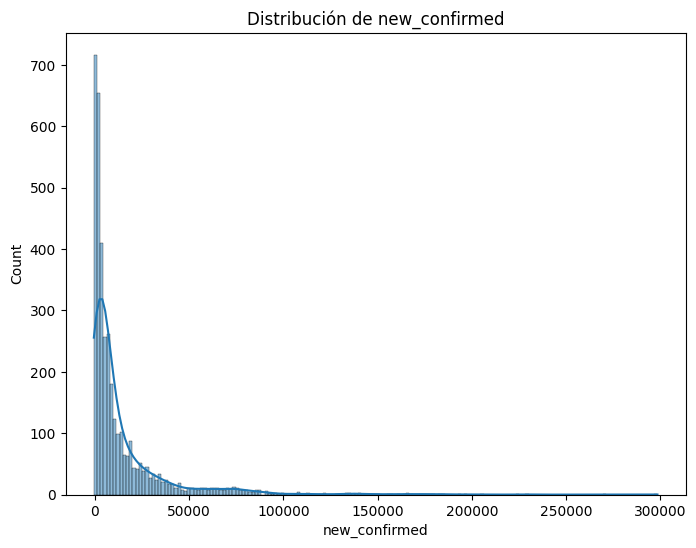

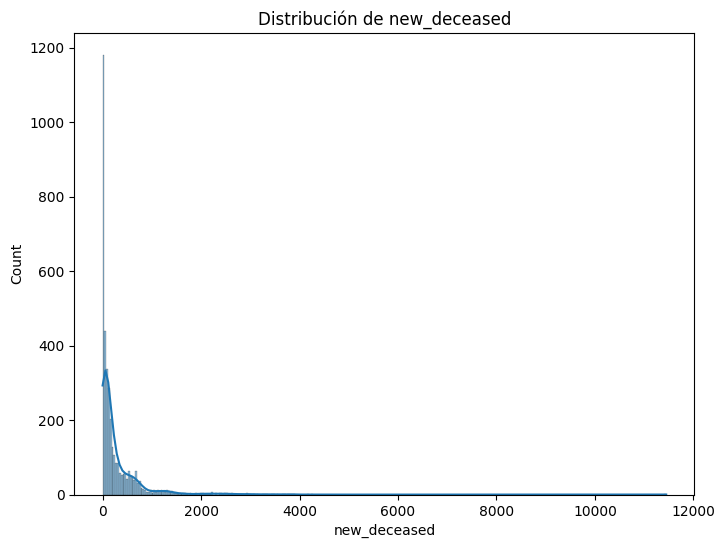

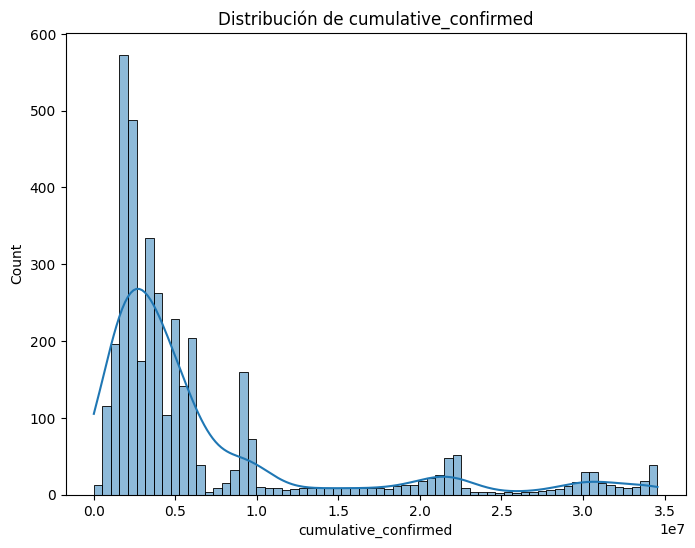

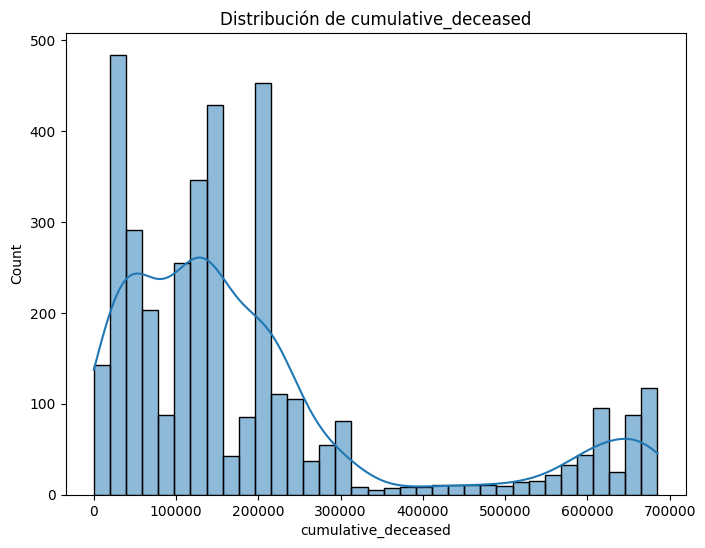

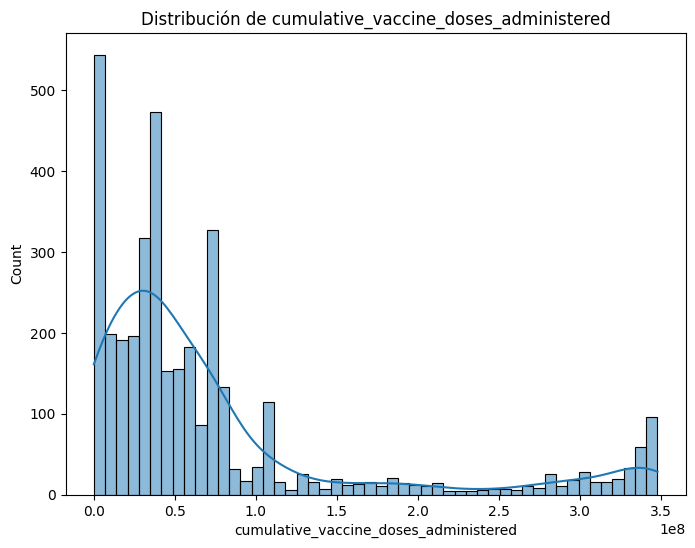

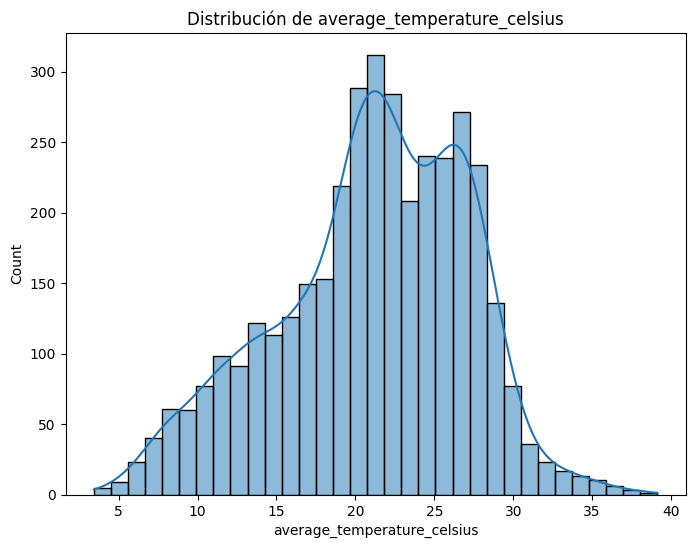

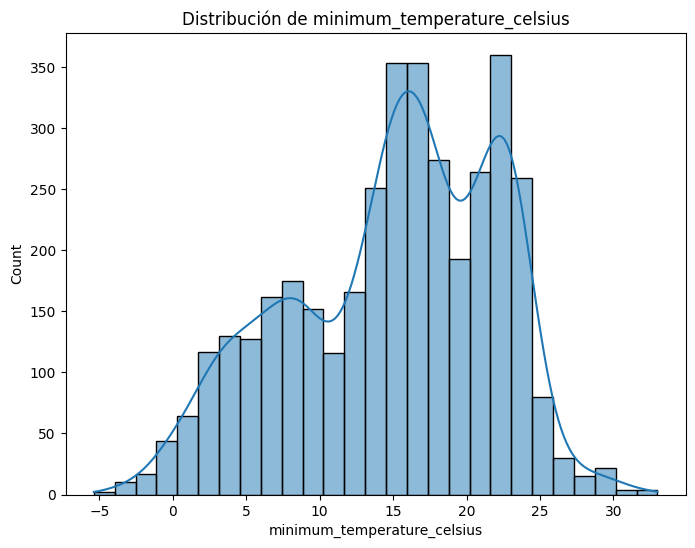

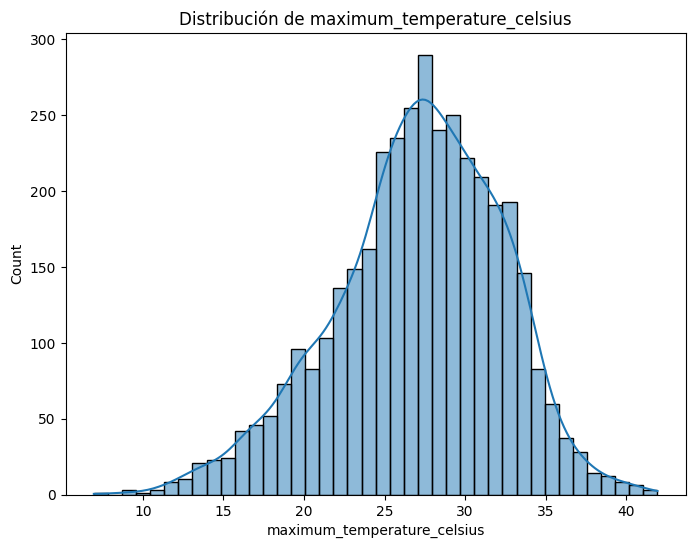

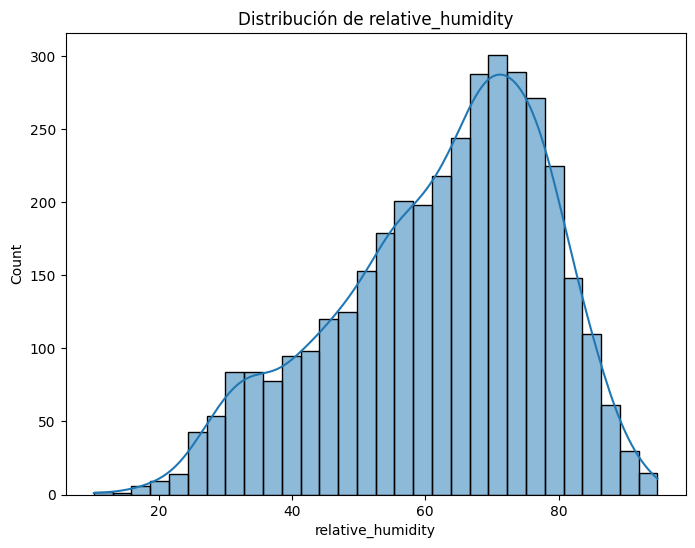

In [39]:
#Nos quedamos con variables de interés
cols_distribucion = ["new_confirmed", "new_deceased", "cumulative_confirmed", "cumulative_deceased", 
                     "cumulative_vaccine_doses_administered", "average_temperature_celsius", 
                     "minimum_temperature_celsius", "maximum_temperature_celsius", "relative_humidity"]

#Repetimos misma lógica anterior, construimos iterable para graficar histogramas para ver distribución
for col in cols_distribucion:
    fig, ax = plt.subplots(figsize = (8,6)) #Creamos figura y eje que contienen los distintos gráficos individuales
    sns.histplot(data = df_final, x = col, ax = ax, kde = True) #Creamos histograma para cada variable
    plt.title(f"Distribución de {col}") #Título de los gráficos
    plt.show()


Boxplot de temperatura media por país

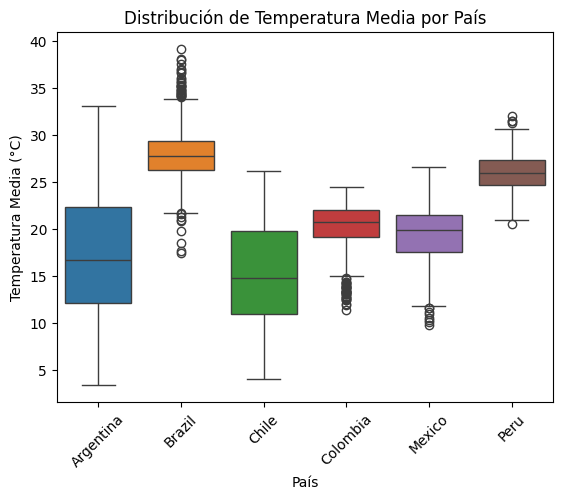

In [40]:
sns.boxplot(data = df_final, x = "country_name", y = "average_temperature_celsius", hue="country_name")
plt.title("Distribución de Temperatura Media por País")
plt.xlabel("País")
plt.ylabel("Temperatura Media (°C)")
plt.xticks(rotation = 45)
plt.show()

Distribución de la población por grupos de edad

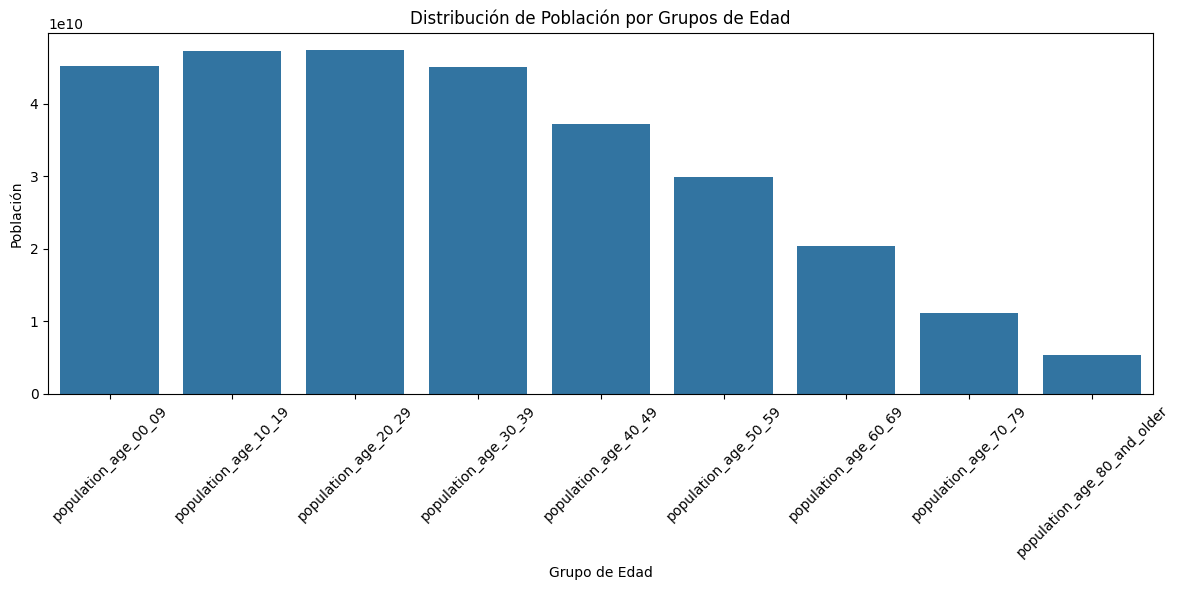

In [ ]:
#Seleccionamos solo las columnas de grupos de edad
age_columns = [col for col in df_final.columns if 'population_age_' in col] #Comprensión de lista
#Sumamos los valores por grupo de edad
age_distribution = df_final[age_columns].sum()

#Creamos el gráfico
plt.figure(figsize=(12, 6)) #Tamaño del gráfico
sns.barplot(x=age_distribution.index, y=age_distribution.values) #Gráfico de barras con los nombres de los grupos en el eje x y los valores en el eje y
plt.title('Distribución de Población por Grupos de Edad') #Título del gráfico
plt.xlabel('Grupo de Edad') #Etiqueta del eje x
plt.ylabel('Población') #Etiqueta del eje y
plt.xticks(rotation=45)  #Rotamos etiquetas para mejor lectura
plt.tight_layout()
plt.show()

### Análisis Bivariado / Multivariado

Función para calcular correlación entre variables del dataset

In [42]:
def correlacion(country = None): #El argumento es un país por si queremos filtrar para un país en específico
    if country == None:
        filtrado = df_final #En caso de que no se especifique se calcula para toda la base
    else:
        filtrado = df_final[df_final["country_name"] == country] #Se filtra la base para el país
    filtrado_numerico = filtrado.select_dtypes(include=['number']) #Nos quedamos con columnas numéricas
    return filtrado_numerico.corr() #Se calcula la correlación entre todas las columnas

correlacion() #Missing values son porque std = 0 (todos los valores son iguales)

,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_rural,population_urban,...,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered
new_confirmed,1.000000,0.523954,0.430191,0.397063,0.310011,0.500893,0.497556,0.496028,0.369331,0.493783,...,-0.040783,0.359462,0.546993,0.442709,-0.208466,0.333721,0.226792,-0.181332,0.325748,0.640912
new_deceased,0.523954,1.000000,0.192127,0.267039,-0.022822,0.452309,0.452550,0.451762,0.390393,0.447192,...,-0.065437,0.344452,0.443887,0.399448,-0.251574,0.355478,0.282475,-0.047738,0.268382,0.531638
cumulative_confirmed,0.430191,0.192127,1.000000,0.904857,0.855820,0.787830,0.782388,0.779464,0.555832,0.770528,...,-0.187783,0.525523,0.883477,0.671009,-0.312544,0.514058,0.337920,-0.261450,0.525016,0.580096
cumulative_deceased,0.397063,0.267039,0.904857,1.000000,0.796257,0.820247,0.819723,0.817821,0.675458,0.806231,...,-0.146146,0.594252,0.851405,0.694645,-0.467189,0.637441,0.523589,0.006788,0.449085,0.549036
cumulative_vaccine_doses_administered,0.310011,-0.022822,0.855820,0.796257,1.000000,0.717631,0.718324,0.716400,0.608112,0.711740,...,-0.206929,0.533500,0.710133,0.635148,-0.332281,0.517262,0.386348,-0.152353,0.393781,0.409983
population,0.500893,0.452309,0.787830,0.820247,0.717631,1.000000,0.999550,0.999631,0.916640,0.998652,...,-0.304388,0.856355,0.913923,0.952898,-0.610342,0.838056,0.665998,-0.233110,0.691189,0.606650
population_male,0.497556,0.452550,0.782388,0.819723,0.718324,0.999550,1.000000,0.999932,0.922819,0.998056,...,-0.299854,0.849602,0.906430,0.948196,-0.602810,0.835326,0.662931,-0.223190,0.677731,0.606601
population_female,0.496028,0.451762,0.779464,0.817821,0.716400,0.999631,0.999932,1.000000,0.925271,0.998461,...,-0.301936,0.855371,0.904546,0.951234,-0.611371,0.841226,0.670457,-0.221165,0.683179,0.603717
population_rural,0.369331,0.390393,0.555832,0.675458,0.608112,0.916640,0.922819,0.925271,1.000000,0.926180,...,-0.318034,0.892428,0.684082,0.921074,-0.720693,0.910779,0.797234,-0.057858,0.626165,0.456995
population_urban,0.493783,0.447192,0.770528,0.806231,0.711740,0.998652,0.998056,0.998461,0.926180,1.000000,...,-0.329522,0.875985,0.903333,0.964159,-0.623107,0.845810,0.678862,-0.240457,0.689736,0.590277


Matriz de correlación

[]

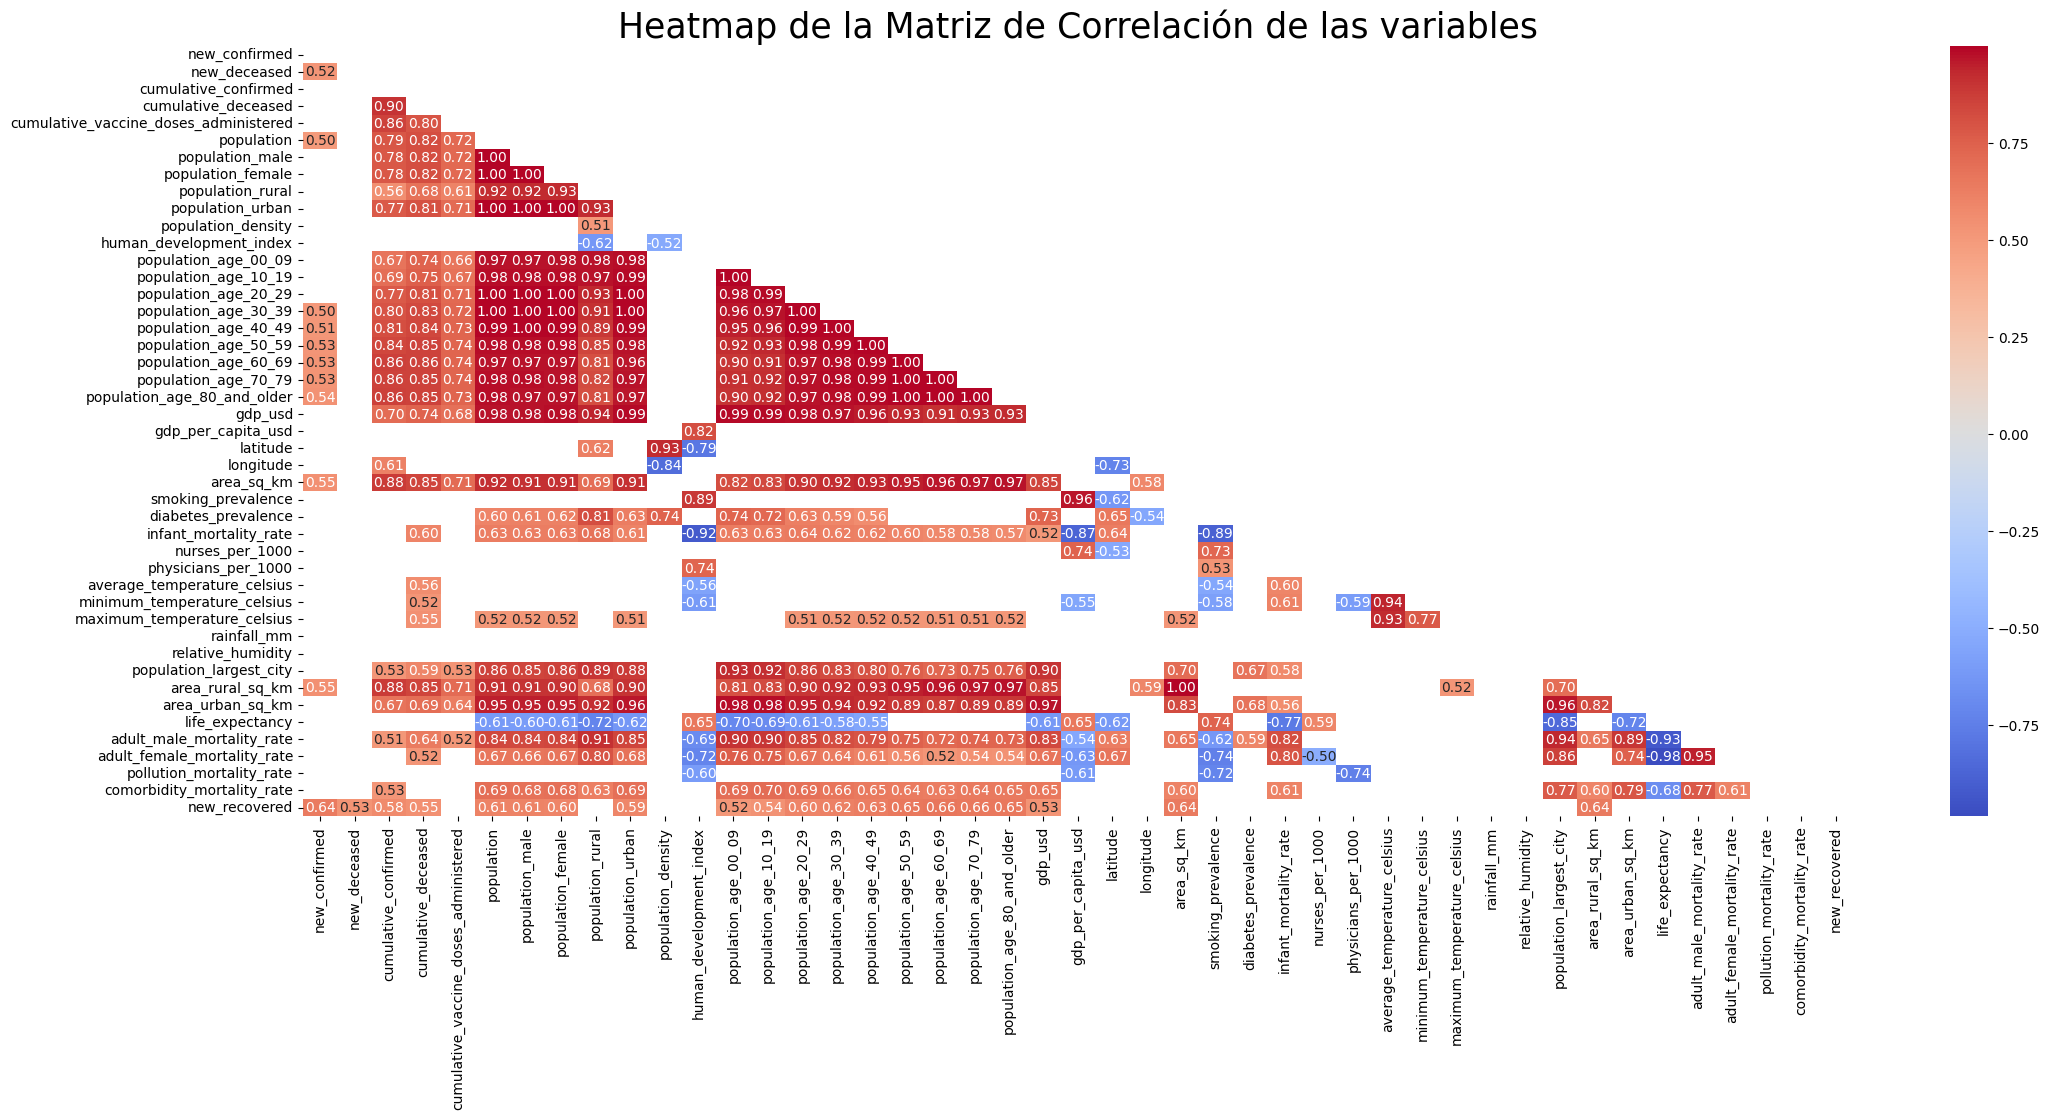

In [43]:
#Llamamos a la función de correlación para obtener un dataframe
df_corr = correlacion() 
#Nos filtramos por los valores mayores a 0.5
df_corr = df_corr[abs(df_corr) > abs(0.5)]
#Creamos máscara para el triangulo superior
mascara = np.triu(np.ones_like(df_corr, dtype=bool)) #Creamos array con misma forma que df_corr y llenamos con True el triangulo superior

#Creamos el gráfico
plt.figure(figsize=(25,10)) #Establecemos el tamaño de la figura
sns.heatmap(df_corr,annot=True, mask=mascara, cmap= "coolwarm", fmt=".2f")
plt.title("Heatmap de la Matriz de Correlación de las variables", fontsize = 25) #Le ponemos título
plt.plot() #Mostramos el gráfico

Diagramas de dispersión de la temperatura media contra los casos confirmados por país

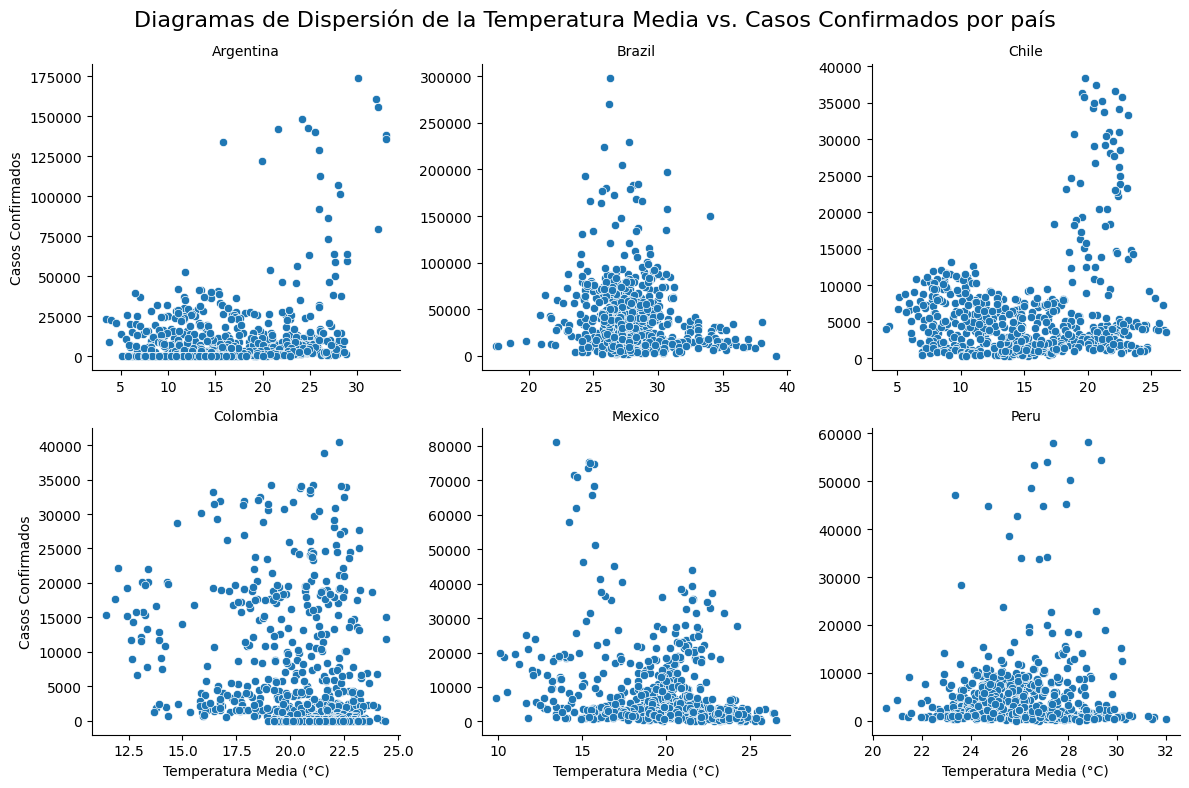

In [ ]:
# Crear el FacetGrid
g = sns.FacetGrid(df_final, col="country_name", col_wrap=3, height=4, sharex=False, sharey=False)

# Mapear los scatterplots a cada faceta
g.map(sns.scatterplot, "average_temperature_celsius", "new_confirmed")

# Ajustar los títulos y etiquetas
g.set_titles("{col_name}")  # Usa el nombre del país como título
g.set_axis_labels("Temperatura Media (°C)", "Casos Confirmados")
g.fig.suptitle("Diagramas de Dispersión de la Temperatura Media vs. Casos Confirmados por país",size = 16)

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()

Diagramas de dispersión de la temperatura media contra las muertes confirmadas por país

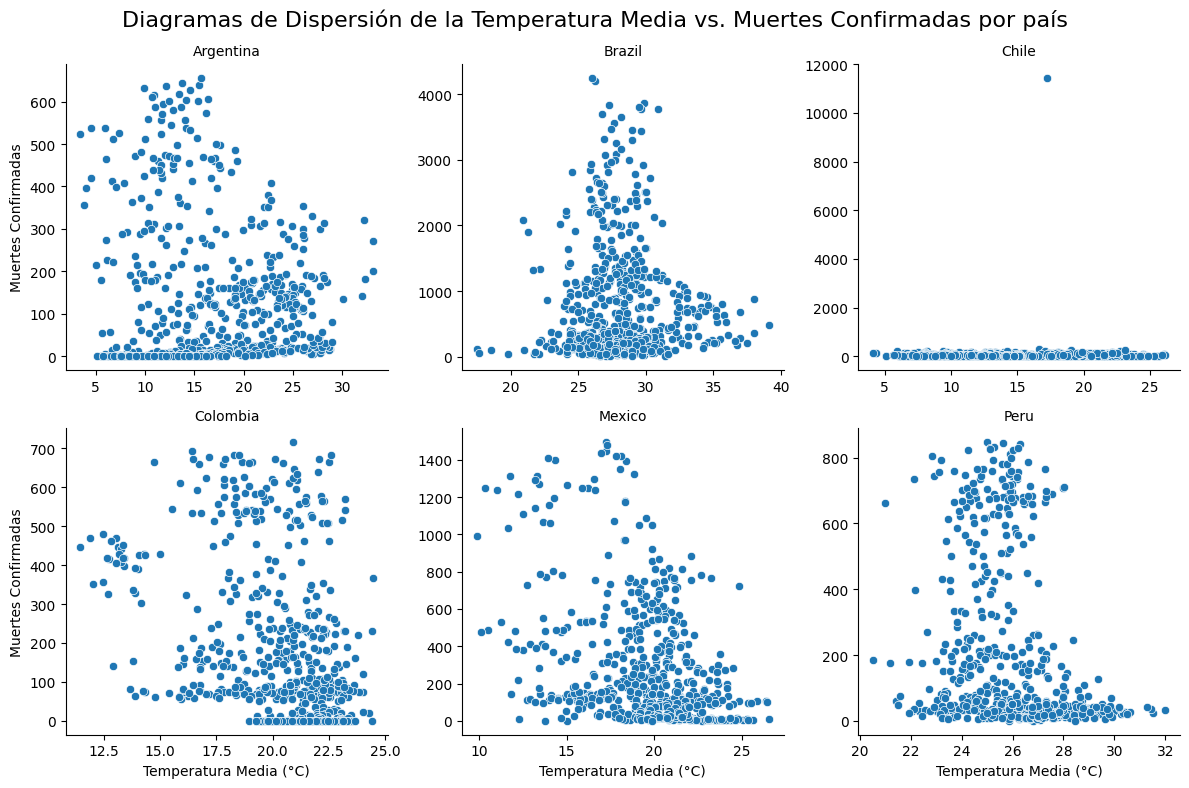

In [21]:
# Crear el FacetGrid
h = sns.FacetGrid(df_final, col="country_name", col_wrap=3, height=4, sharex=False, sharey=False)

# Mapear los scatterplots a cada faceta
h.map(sns.scatterplot, "average_temperature_celsius", "new_deceased")

# Ajustar los títulos y etiquetas
h.set_titles("{col_name}")  # Usa el nombre del país como título
h.set_axis_labels("Temperatura Media (°C)", "Muertes Confirmadas")
h.fig.suptitle("Diagramas de Dispersión de la Temperatura Media vs. Muertes Confirmadas por país",size = 16)

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()

Relación entre la Cobertura de Vacunación y la Cantidad de Casos Nuevos

C:\Users\gianp\AppData\Local\Temp\ipykernel_27900\3257388361.py:2: FutureWarning: 'SM' is deprecated and will be removed in a future version, please use 'SME' instead.
  df_final_media_semimensual = df_final.resample("SM").mean(numeric_only=True)


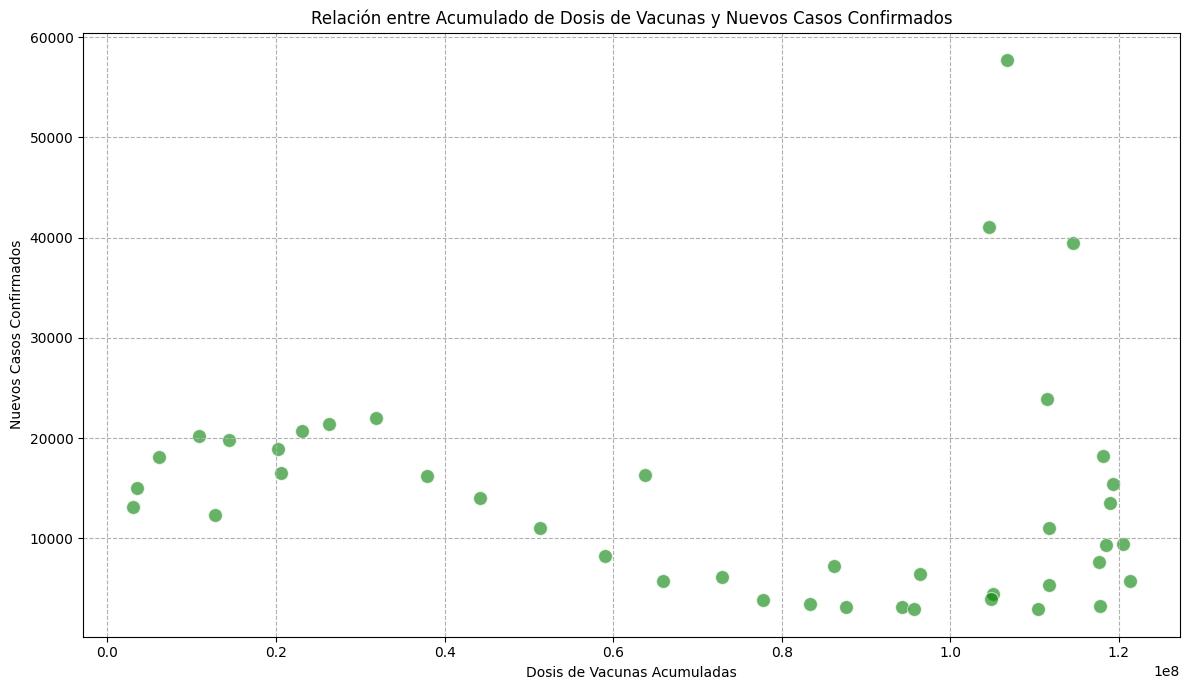

In [70]:
#Armamos DF agrupando la media semi-mensual(15 dias) de las vars numéricas para limpiar el gráfico
df_final_media_semimensual = df_final.resample("SM").mean(numeric_only=True) 

#Establecemos tamaño del gráfico
plt.figure(figsize=(12, 7)) 

#Generamos el gráfico de dispersión
sns.scatterplot(data=df_final_media_semimensual, x='cumulative_vaccine_doses_administered', y='new_confirmed', color='green', alpha=0.6, s=100)  # s controla el tamaño de los puntos

#Personalizamos el gráfico
plt.title('Relación entre Acumulado de Dosis de Vacunas y Nuevos Casos Confirmados')
plt.xlabel('Dosis de Vacunas Acumuladas')
plt.ylabel('Nuevos Casos Confirmados')
plt.grid(True, linestyle='--') #Mostramos la cuadrícula

plt.tight_layout()
plt.show()

### Análisis Temporal

Evolución de las dosis acumuladas por mes de cada país

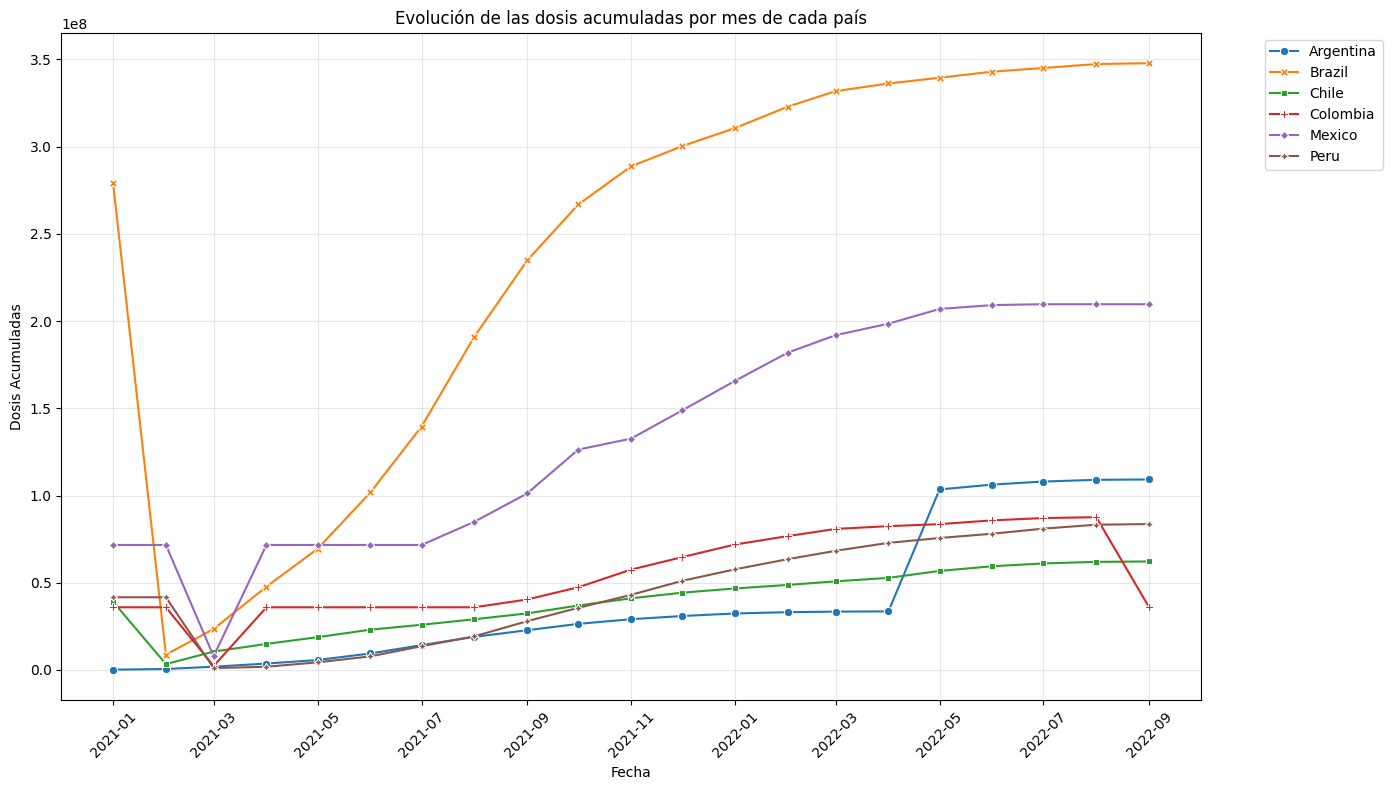

In [85]:
#Construimos df para análisis
df1 = (
    df_final.groupby("country_name") #Agrupamos por país
    .resample("MS") #Resampleamos por mes dentro de cada grupo
    ['cumulative_vaccine_doses_administered'].max() #Tomamos el máximo(último día) de cada mes
    .reset_index() # Volvemos a tener columnas normales
    )

#Armamos el gráfico
plt.figure(figsize=(14, 8))

#Convertimos el resultado para graficar
sns.lineplot(
    data=df1,
    x='date',
    y='cumulative_vaccine_doses_administered',
    hue='country_name',
    style='country_name',  #Diferentes estilos de línea por país
    markers=True,     #Mostrar marcadores
    dashes=False      #Líneas continuas
)

plt.title('Evolución de las dosis acumuladas por mes de cada país')
plt.xlabel('Fecha')
plt.ylabel('Dosis Acumuladas')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Evolución del número de muertes diarias

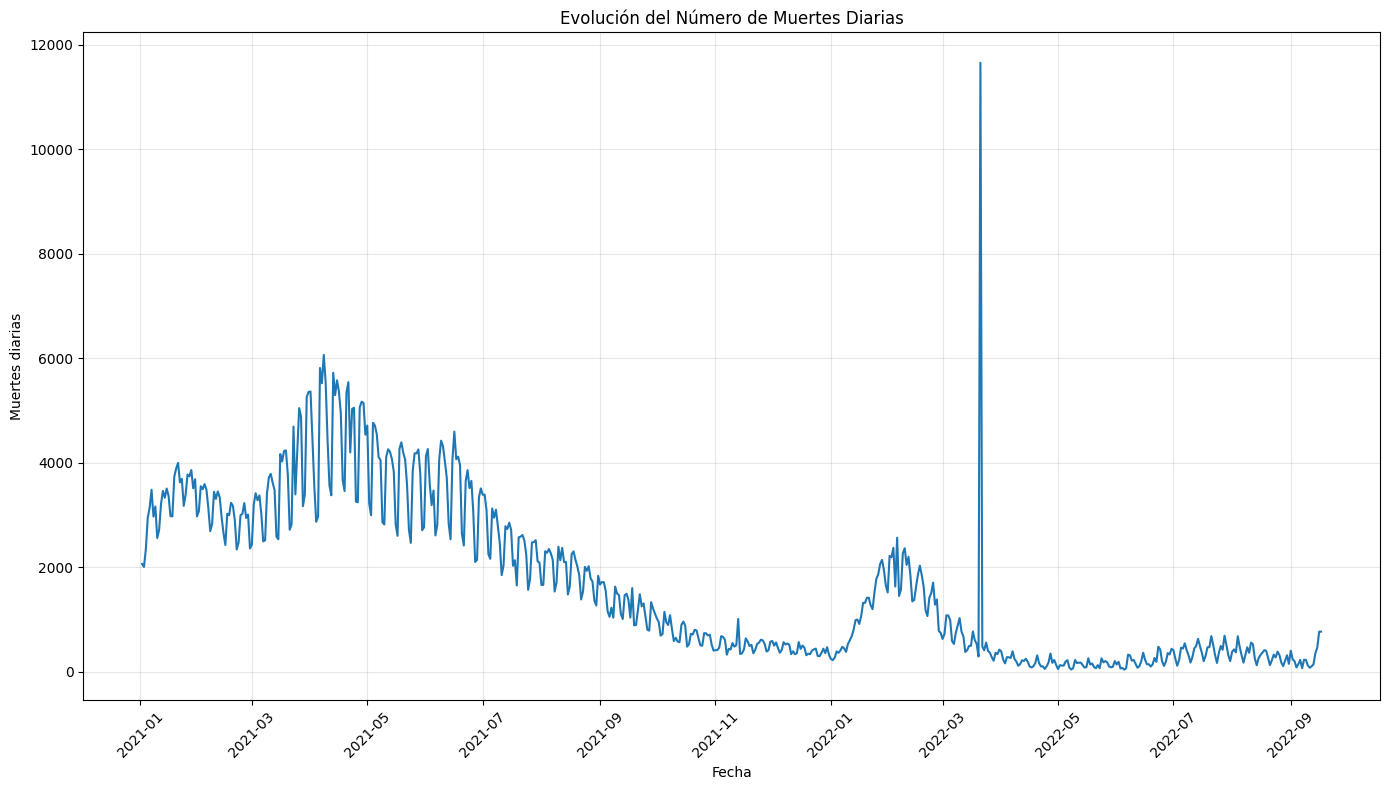

In [91]:
#Creamos DF agrupando por la suma de muertes diarias
df2 = df_final.resample("D").sum(numeric_only=True)["new_deceased"].reset_index()

#Armamos el gráfico
plt.figure(figsize=(14, 8))

# Convertimos el resultado para graficar
sns.lineplot(
    data=df2,
    x='date',
    y='new_deceased',
    dashes=False      #Líneas continuas
)

plt.title('Evolución del Número de Muertes Diarias')
plt.xlabel('Fecha')
plt.ylabel('Muertes diarias')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Variación Mensual de Casos y Muertes

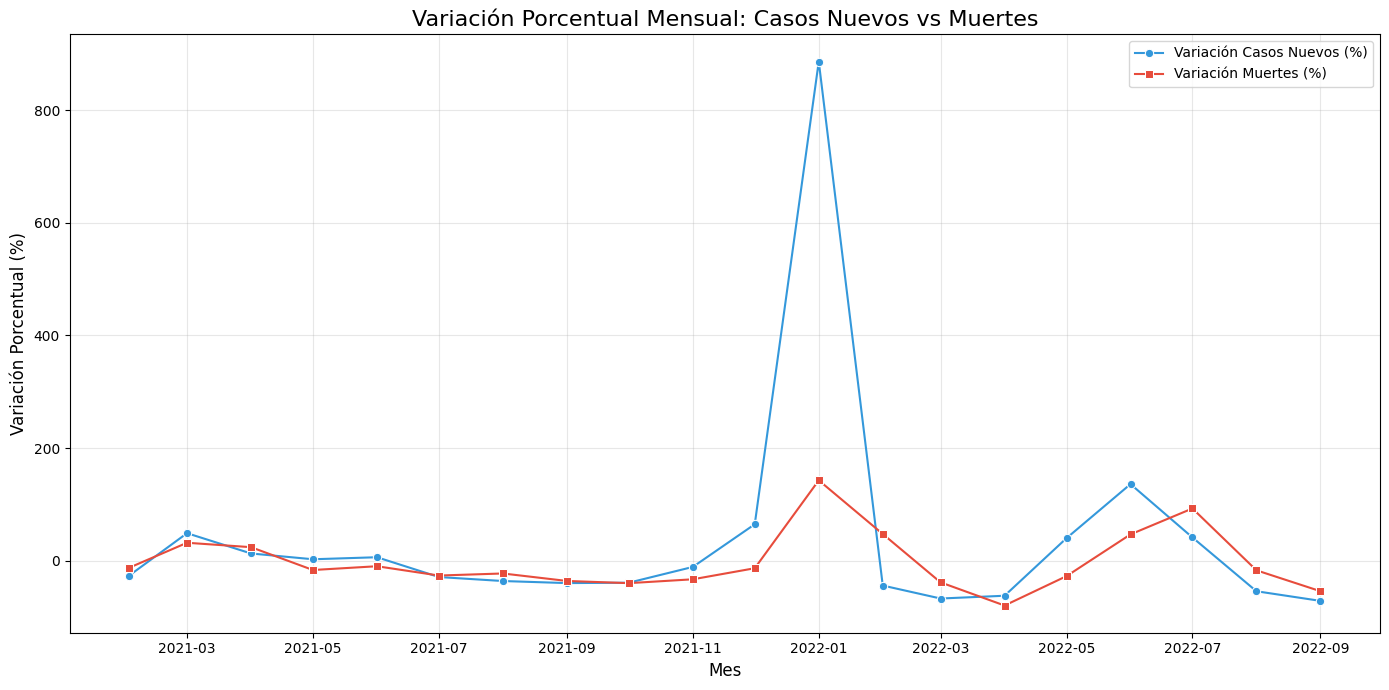

In [101]:
#Creamos df
df3 = df_final.resample("MS").sum(numeric_only=True).reset_index() #Resample por mes y sumamos los valores de cada columna
df3['variacion_porcentual_confirmed'] = df3['new_confirmed'].pct_change() * 100 #Calculamos la variación porcentual de los casos confirmados
df3['variacion_porcentual_deceased'] = df3['new_deceased'].pct_change() * 100 #Calculamos la variación porcentual de los fallecidos

plt.figure(figsize=(14, 7))

# Línea para casos
sns.lineplot(data=df3, x='date', y='variacion_porcentual_confirmed',
             color='#3498db', marker='o', label='Variación Casos Nuevos (%)')

# Línea para muertes
sns.lineplot(data=df3, x='date', y='variacion_porcentual_deceased',
             color='#e74c3c', marker='s', label='Variación Muertes (%)')

# Configuración del gráfico
plt.title('Variación Porcentual Mensual: Casos Nuevos vs Muertes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Variación Porcentual (%)', fontsize=12)

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Análisis Geográfico

Gráficos de barras de países contra el resto de variables

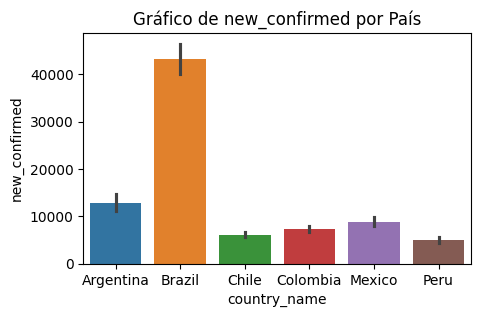

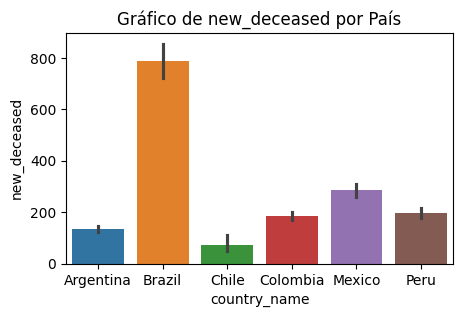

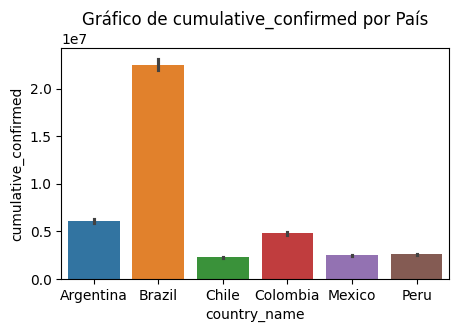

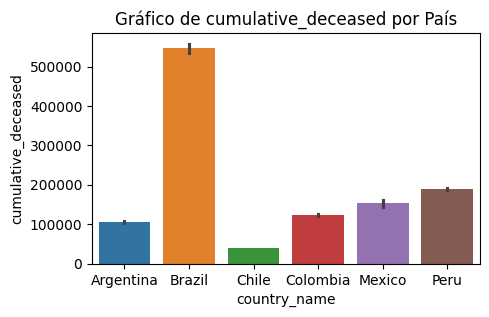

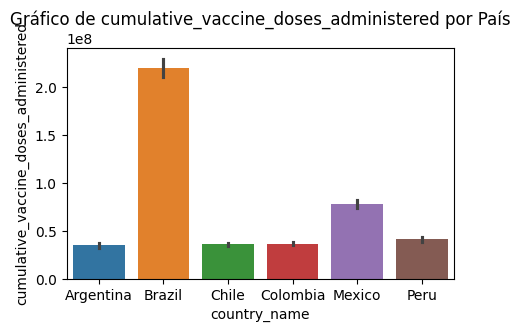

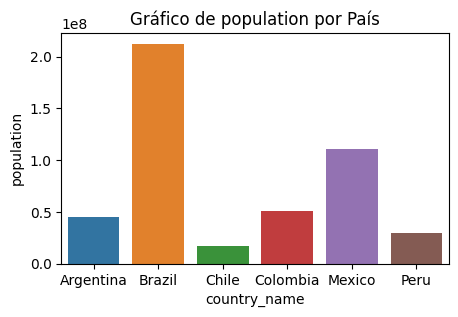

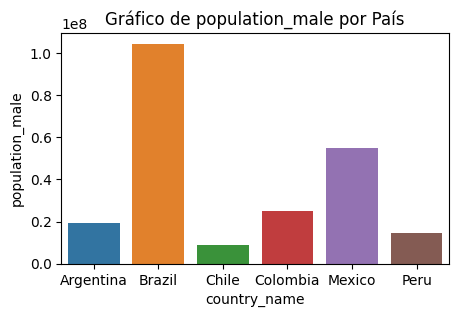

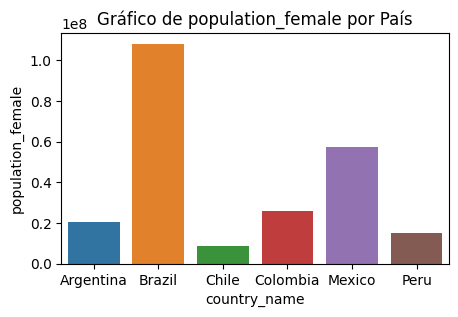

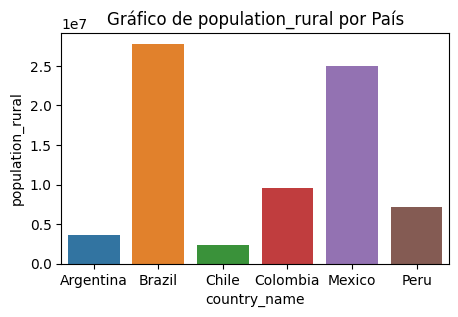

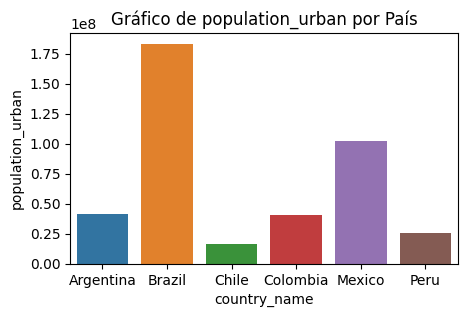

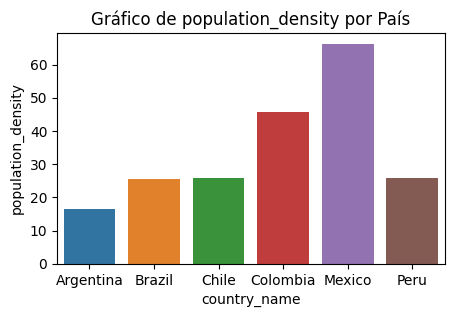

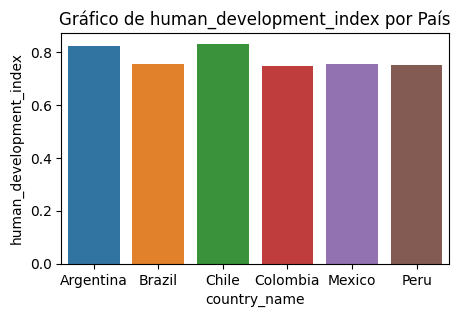

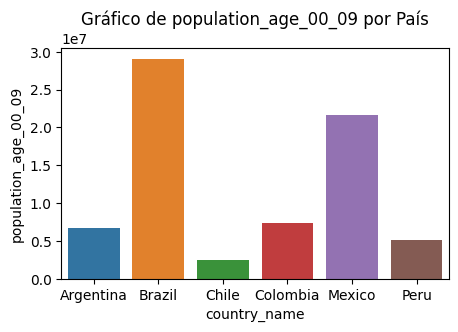

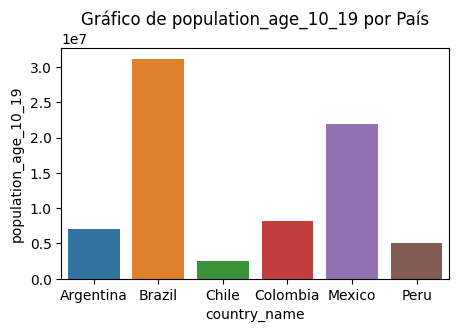

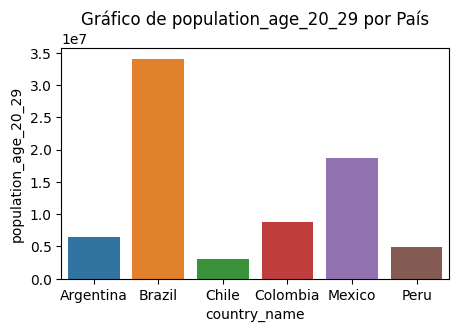

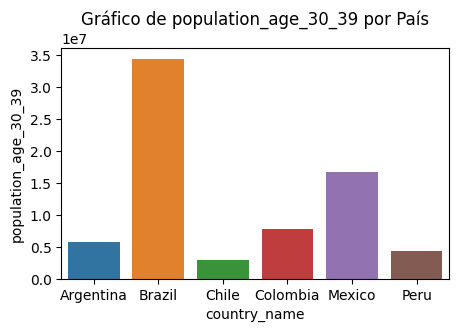

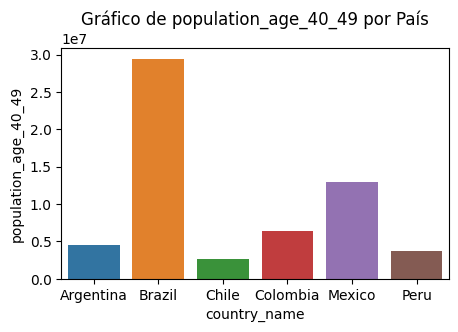

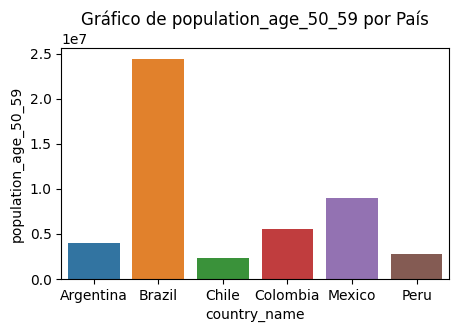

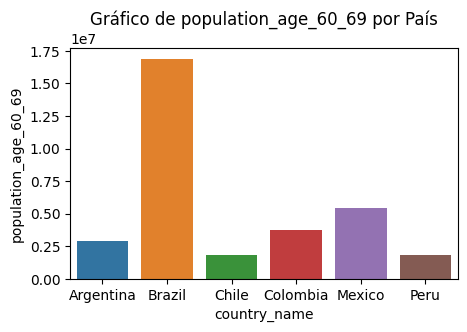

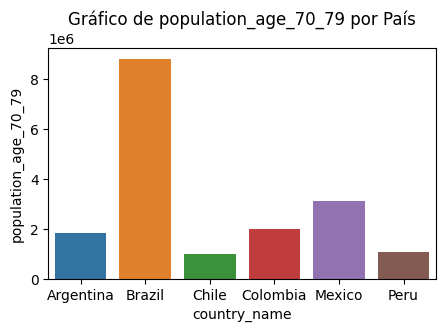

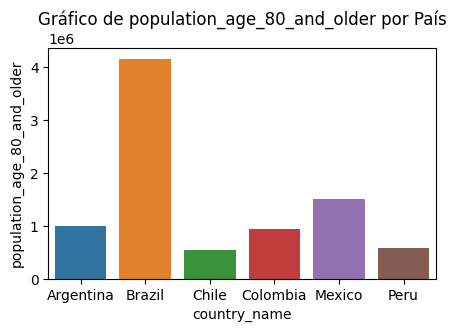

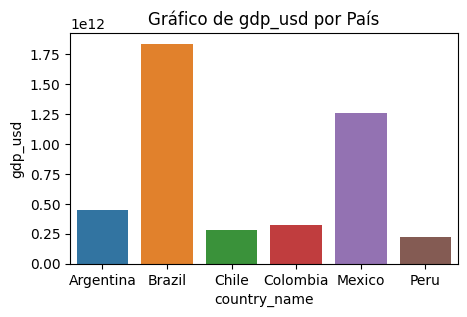

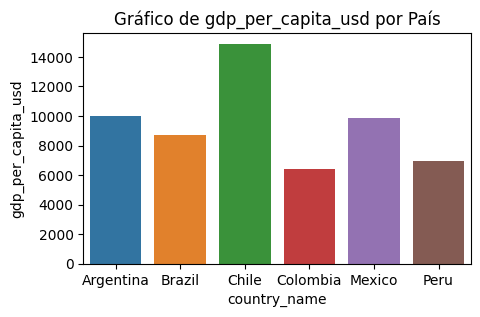

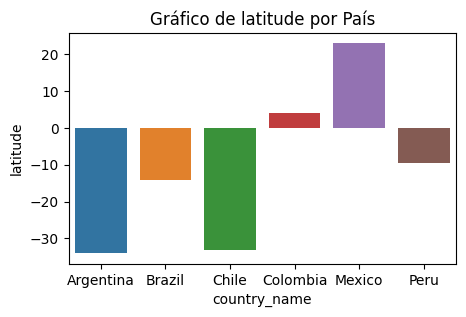

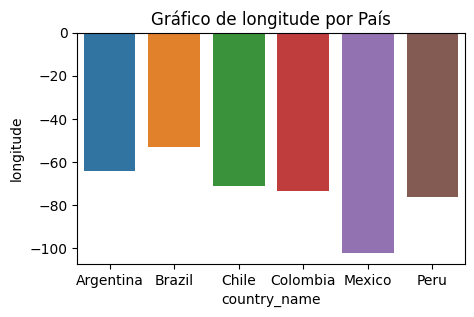

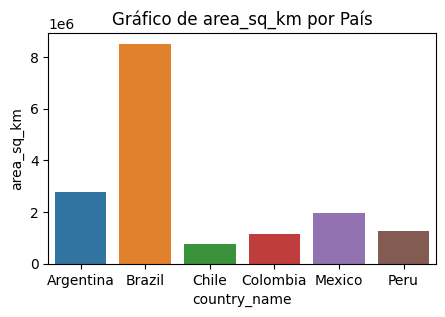

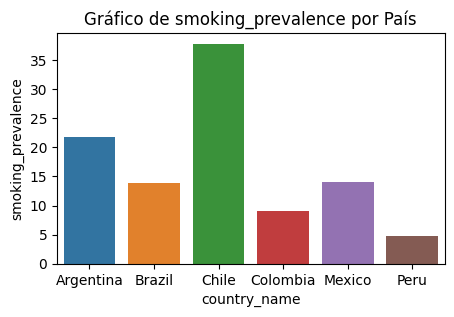

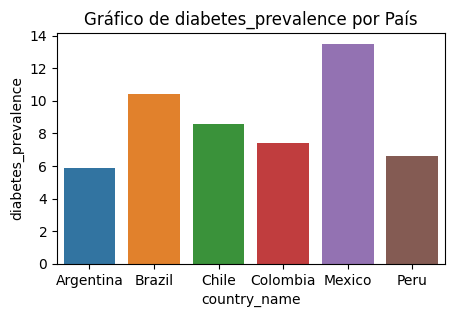

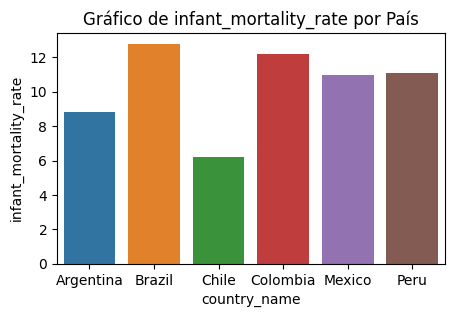

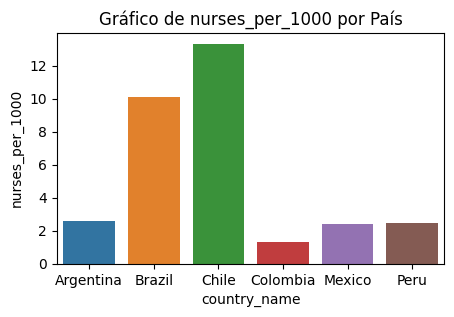

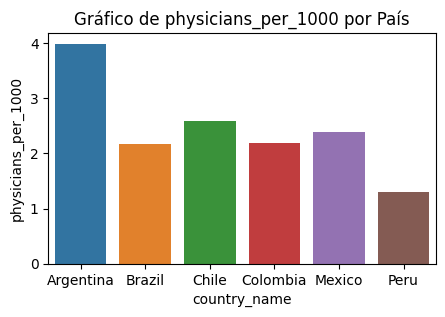

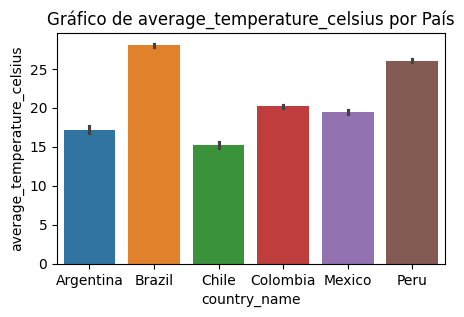

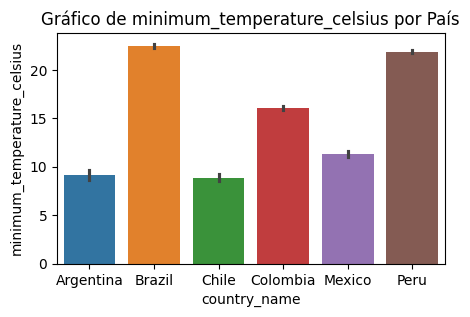

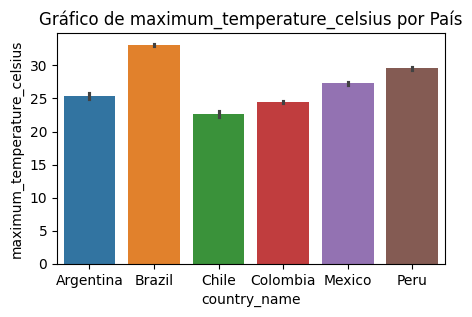

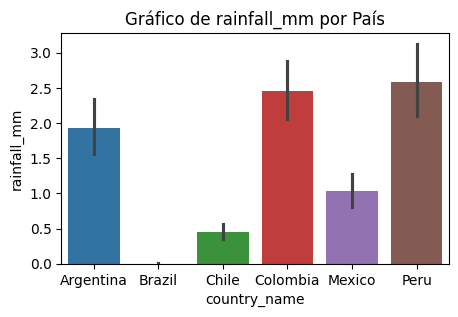

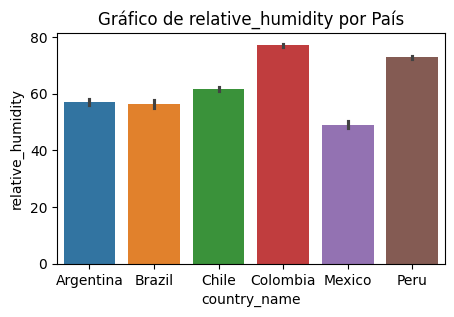

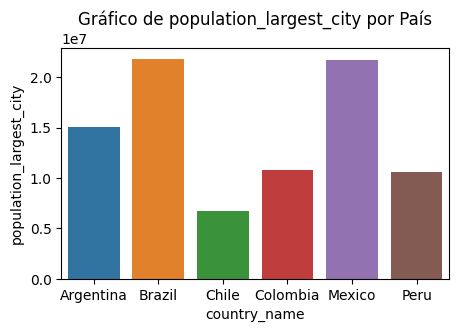

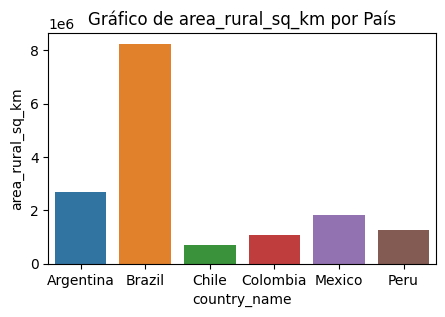

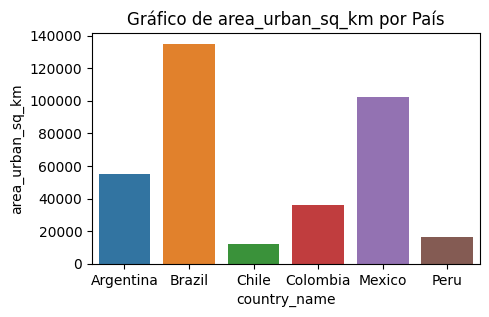

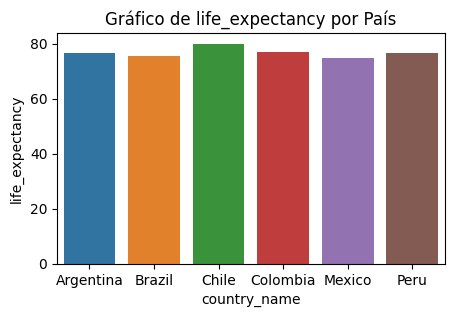

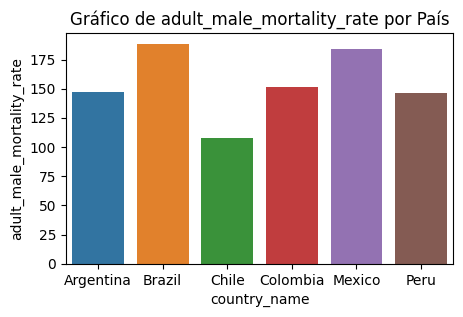

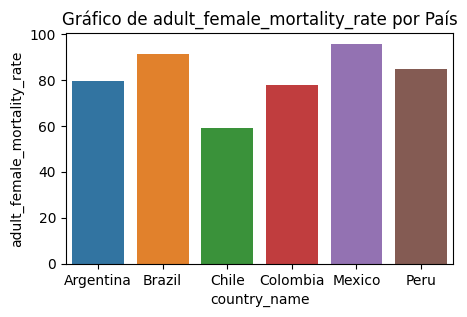

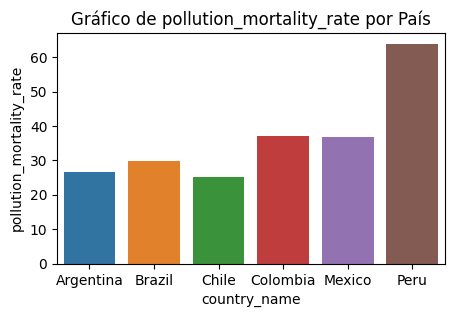

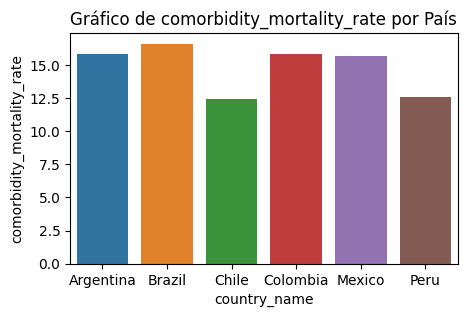

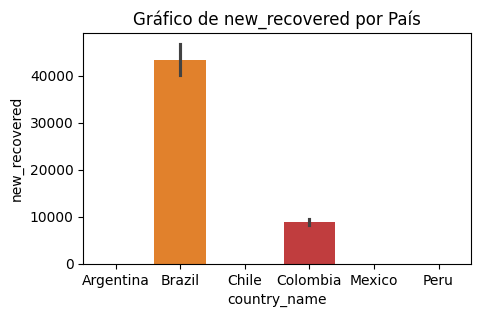

In [79]:
#Armamos df solo con variables numéricas
df_num = df_final.select_dtypes(include=['number'])

#Construimos iterable para graficar cada país contra el resto de variables
for col in df_num.columns:
    fig, ax = plt.subplots(figsize = (5,3)) #Creamos figura y eje que contienen los distintos gráficos individuales
    sns.barplot(data = df_final, x = "country_name", y = col, ax = ax, hue = "country_name") #Creamos gráfico de barras para cada país
    plt.title(f"Gráfico de {col} por País") #Título de los gráficos
    plt.show()